In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [16]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
data1["target"].unique()

array([0., 1., 2.])

In [18]:
df = data1.loc[(data1['target'] == 0) | (data1['target'] == 1)]

In [19]:
df["target"].unique()

array([0., 1.])

In [20]:
X = df.drop("target", axis=1)
y = df["target"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

TO SCREEN:
- XGBoost
- Random Forest
- Decision Tree
- Bagging
- LightGBM
- SVM
- KNN
- Naive Bayes
- Logistic Regression
- BaseModel

EVALUATION TO DO:
- Confusion Matrix
- Accuracy
- F1 Score
- Sensitivity
- Specificity
- ROC Curve
- ROC AUC score

In [1]:
import data_prep
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv("marketing_campaign.csv", sep = ";")

In [2]:
import random
random.seed()
X_train, y_train, X_test, y_test = data_prep.prep_data(data, ada = False)

In [3]:
X_test, X_test_final, y_test, y_test_final = train_test_split(X_test, y_test, test_size=0.2, random_state = 2115)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pickle
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [7]:
def evaluate_model(actual, predicted, class_proba):
    cm = confusion_matrix(y_true = actual, y_pred = predicted)
    acc = accuracy_score(y_true = actual, y_pred = predicted) 
    f1 = f1_score(y_true = actual, y_pred = predicted)
    sensitivity = recall_score(y_true = actual, y_pred = predicted)
    specificity = precision_score(y_true = actual, y_pred = predicted)
    fpr, tpr, threshold = roc_curve(y_test, class_proba)
    roc_auc = auc(fpr, tpr)

    return cm, acc, f1, sensitivity, specificity, fpr, tpr, roc_auc

In [8]:
def summarize_evaluation(cm, acc, f1, sensitivity, specificity, fpr, tpr, roc_auc):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot = True, fmt="d")
    plt.title('Confusion Matrix')
    plt.show()
    print("Accuracy reached on test data:", acc)
    print("F1 score reached on test data:", f1)
    print("Sensitivity reached on test data:", sensitivity)
    print("Specificity reached on test data:", specificity)
    plt.figure(figsize=(8, 6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Dummy Classifier

c:\Users\pawel\.conda\envs\BHL9\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


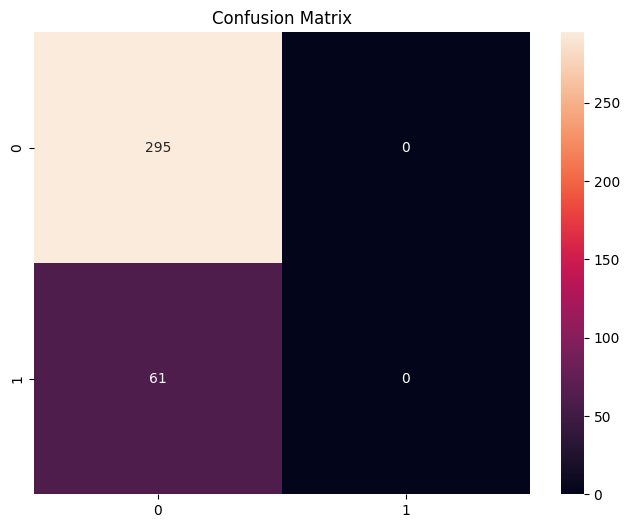

Accuracy reached on test data: 0.8286516853932584
F1 score reached on test data: 0.0
Sensitivity reached on test data: 0.0
Specificity reached on test data: 0.0


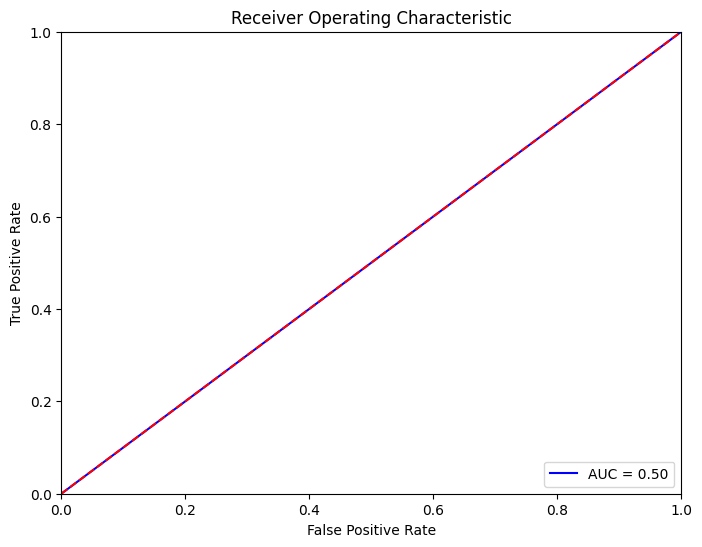

In [12]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
class_probabilities = dummy.predict_proba(X_test)
dummy_proba = class_probabilities[:, 1]
dummy_cm, dummy_acc, dummy_f1, dummy_sensitivity, dummy_specificity, dummy_fpr, dummy_tpr, dummy_roc_auc = evaluate_model(y_test, dummy_pred, dummy_proba)
summarize_evaluation(dummy_cm, dummy_acc, dummy_f1, dummy_sensitivity, dummy_specificity, dummy_fpr, dummy_tpr, dummy_roc_auc)

### XGBoost

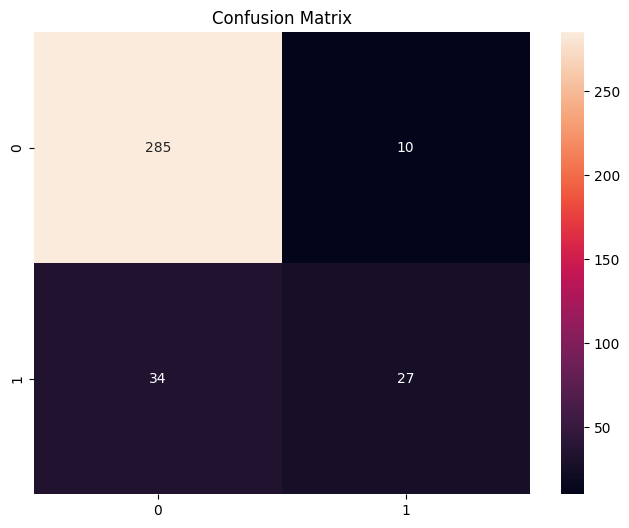

Accuracy reached on test data: 0.8764044943820225
F1 score reached on test data: 0.5510204081632653
Sensitivity reached on test data: 0.4426229508196721
Specificity reached on test data: 0.7297297297297297


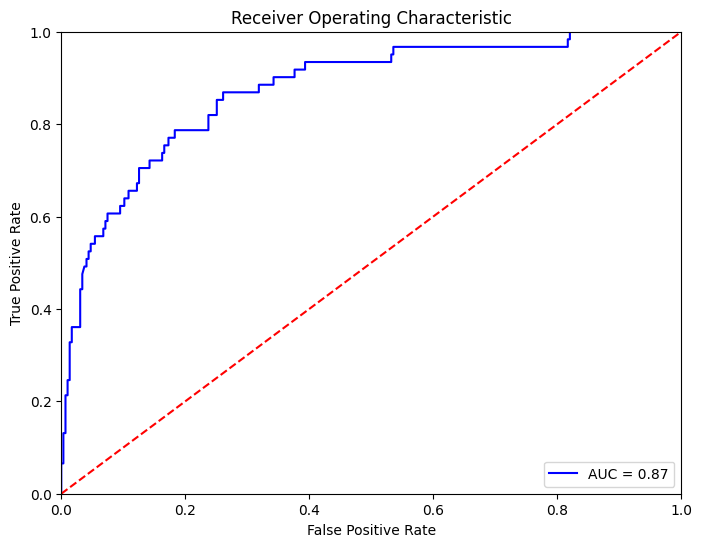

In [13]:
xgb = xgb.XGBClassifier(random_state = 2115)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
class_probabilities = xgb.predict_proba(X_test)
xgb_proba = class_probabilities[:, 1]
xgb_cm, xgb_acc, xgb_f1, xgb_sensitivity, xgb_specificity, xgb_fpr, xgb_tpr, xgb_roc_auc = evaluate_model(y_test, xgb_pred, xgb_proba)
summarize_evaluation(xgb_cm, xgb_acc, xgb_f1, xgb_sensitivity, xgb_specificity, xgb_fpr, xgb_tpr, xgb_roc_auc)

### Random Forest

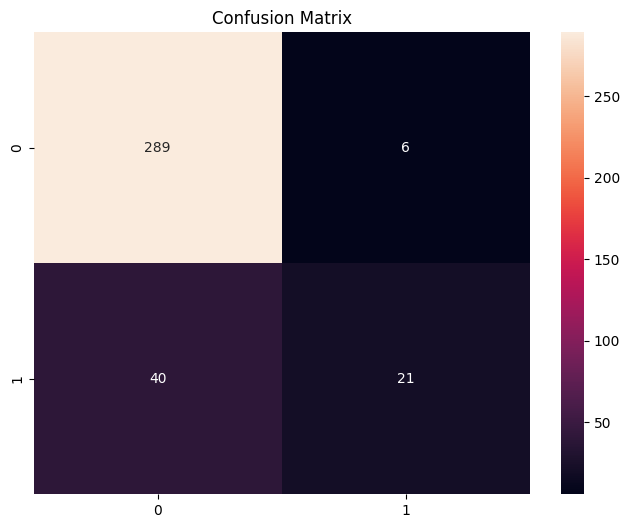

Accuracy reached on test data: 0.8707865168539326
F1 score reached on test data: 0.4772727272727273
Sensitivity reached on test data: 0.3442622950819672
Specificity reached on test data: 0.7777777777777778


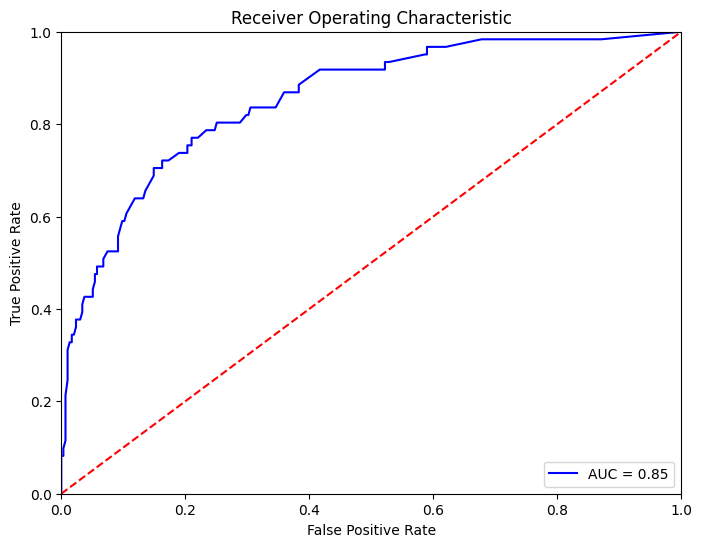

In [14]:
rf = RandomForestClassifier(random_state = 2115)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
class_probabilities = rf.predict_proba(X_test)
rf_proba = class_probabilities[:, 1]
rf_cm, rf_acc, rf_f1, rf_sensitivity, rf_specificity, rf_fpr, rf_tpr, rf_roc_auc = evaluate_model(y_test, rf_pred, rf_proba)
summarize_evaluation(rf_cm, rf_acc, rf_f1, rf_sensitivity, rf_specificity, rf_fpr, rf_tpr, rf_roc_auc)

### Decision Tree

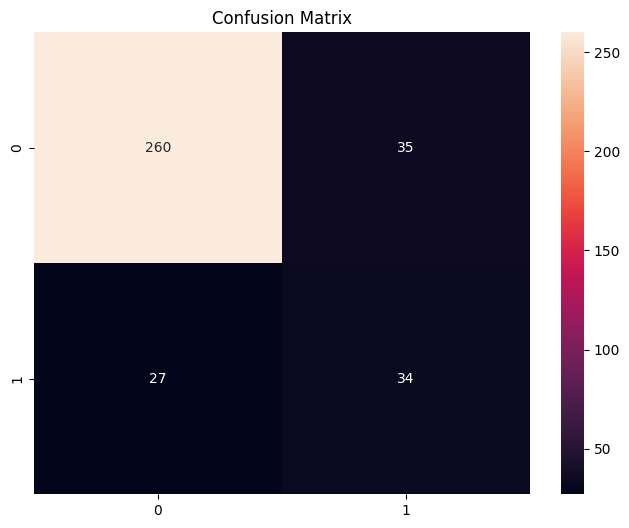

Accuracy reached on test data: 0.8258426966292135
F1 score reached on test data: 0.5230769230769231
Sensitivity reached on test data: 0.5573770491803278
Specificity reached on test data: 0.4927536231884058


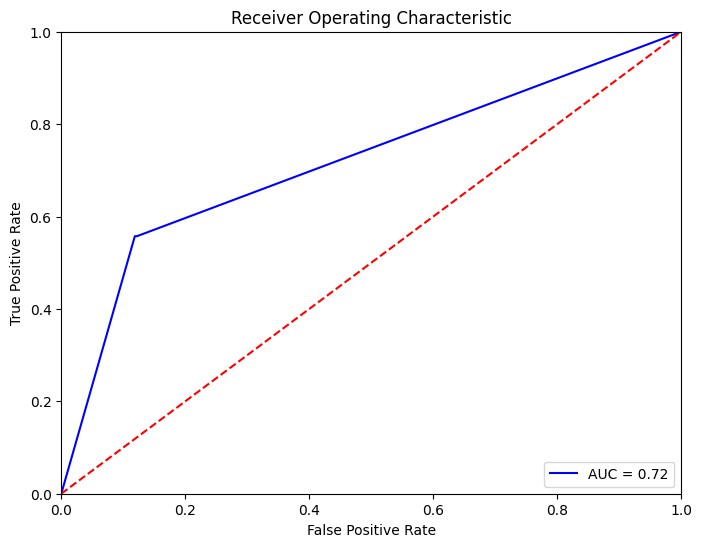

In [15]:
dt = DecisionTreeClassifier(random_state = 2115)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
class_probabilities = dt.predict_proba(X_test)
dt_proba = class_probabilities[:, 1]
dt_cm, dt_acc, dt_f1, dt_sensitivity, dt_specificity, dt_fpr, dt_tpr, dt_roc_auc = evaluate_model(y_test, dt_pred, dt_proba)
summarize_evaluation(dt_cm, dt_acc, dt_f1, dt_sensitivity, dt_specificity, dt_fpr, dt_tpr, dt_roc_auc)

### Bagging

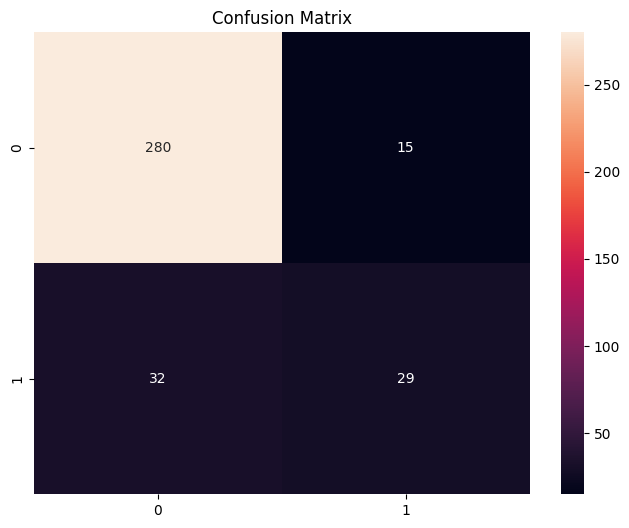

Accuracy reached on test data: 0.8679775280898876
F1 score reached on test data: 0.5523809523809524
Sensitivity reached on test data: 0.47540983606557374
Specificity reached on test data: 0.6590909090909091


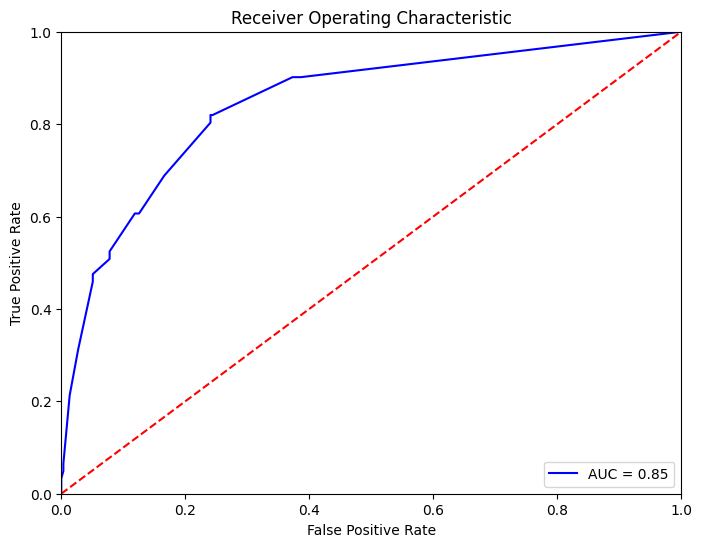

In [16]:
bg = BaggingClassifier(random_state = 2115)
bg.fit(X_train, y_train)
bg_pred = bg.predict(X_test)
class_probabilities = bg.predict_proba(X_test)
bg_proba = class_probabilities[:, 1]
bg_cm, bg_acc, bg_f1, bg_sensitivity, bg_specificity, bg_fpr, bg_tpr, bg_roc_auc = evaluate_model(y_test, bg_pred, bg_proba)
summarize_evaluation(bg_cm, bg_acc, bg_f1, bg_sensitivity, bg_specificity, bg_fpr, bg_tpr, bg_roc_auc)

### LightGBM

[LightGBM] [Info] Number of positive: 248, number of negative: 1535
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1558
[LightGBM] [Info] Number of data points in the train set: 1783, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.139091 -> initscore=-1.822857
[LightGBM] [Info] Start training from score -1.822857


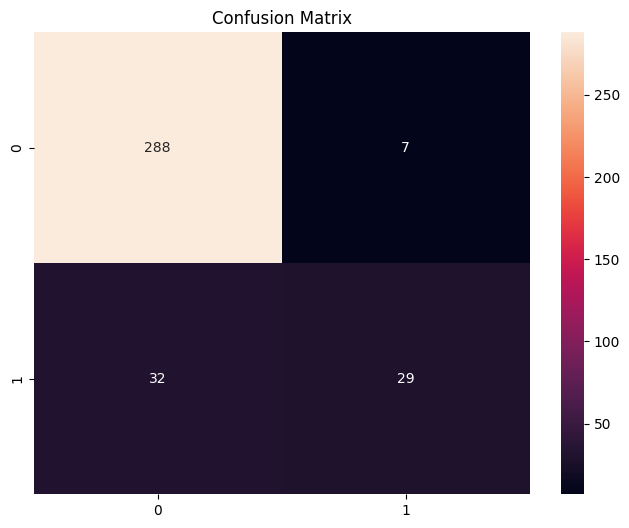

Accuracy reached on test data: 0.8904494382022472
F1 score reached on test data: 0.5979381443298969
Sensitivity reached on test data: 0.47540983606557374
Specificity reached on test data: 0.8055555555555556


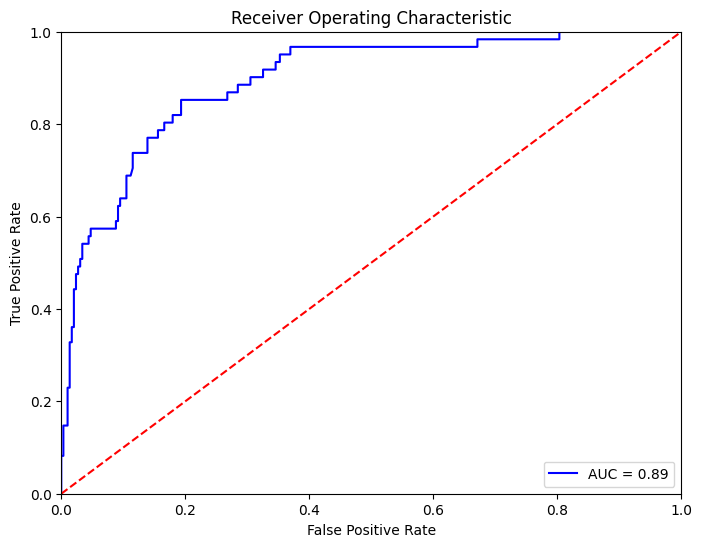

In [17]:
gbm = LGBMClassifier(random_state = 2115)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
class_probabilities = gbm.predict_proba(X_test)
gbm_proba = class_probabilities[:, 1]
gbm_cm, gbm_acc, gbm_f1, gbm_sensitivity, gbm_specificity, gbm_fpr, gbm_tpr, gbm_roc_auc = evaluate_model(y_test, gbm_pred, gbm_proba)
summarize_evaluation(gbm_cm, gbm_acc, gbm_f1, gbm_sensitivity, gbm_specificity, gbm_fpr, gbm_tpr, gbm_roc_auc)

### SVM

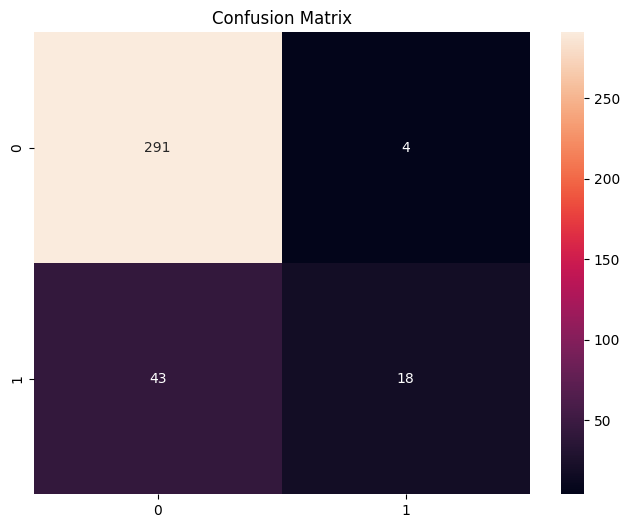

Accuracy reached on test data: 0.8679775280898876
F1 score reached on test data: 0.43373493975903615
Sensitivity reached on test data: 0.29508196721311475
Specificity reached on test data: 0.8181818181818182


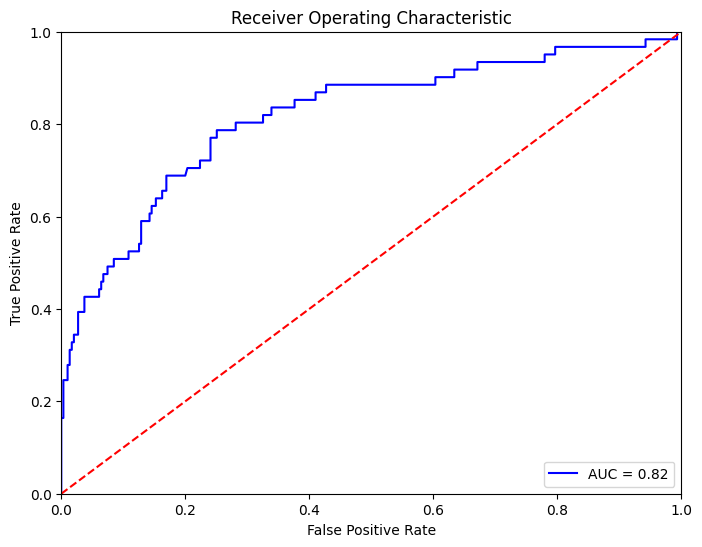

In [18]:
svc = SVC(random_state = 2115, kernel = "poly", probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
class_probabilities = svc.predict_proba(X_test)
svc_proba = class_probabilities[:, 1]
svc_cm, svc_acc, svc_f1, svc_sensitivity, svc_specificity, svc_fpr, svc_tpr, svc_roc_auc = evaluate_model(y_test, svc_pred, svc_proba)
summarize_evaluation(svc_cm, svc_acc, svc_f1, svc_sensitivity, svc_specificity, svc_fpr, svc_tpr, svc_roc_auc)

### KNN

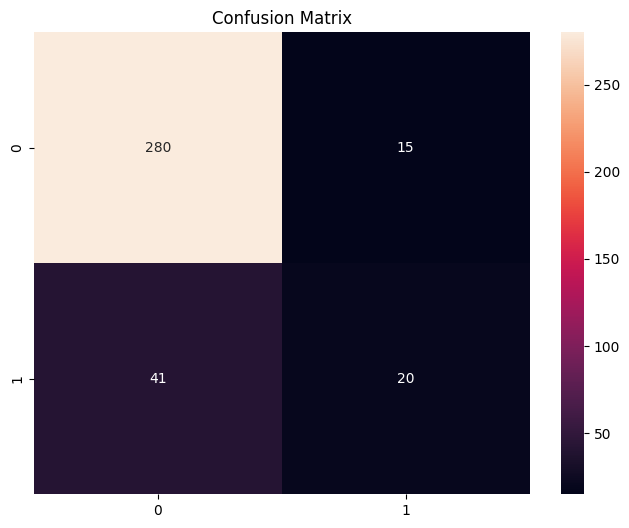

Accuracy reached on test data: 0.8426966292134831
F1 score reached on test data: 0.4166666666666667
Sensitivity reached on test data: 0.32786885245901637
Specificity reached on test data: 0.5714285714285714


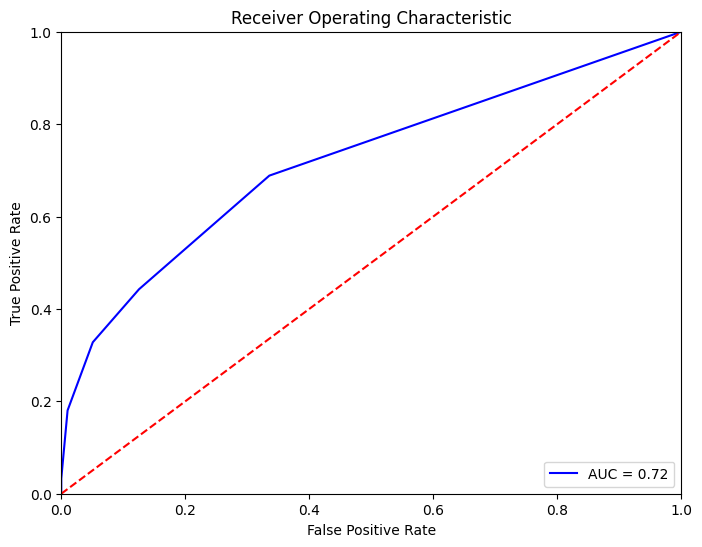

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
class_probabilities = knn.predict_proba(X_test)
knn_proba = class_probabilities[:, 1]
knn_cm, knn_acc, knn_f1, knn_sensitivity, knn_specificity, knn_fpr, knn_tpr, knn_roc_auc = evaluate_model(y_test, knn_pred, knn_proba)
summarize_evaluation(knn_cm, knn_acc, knn_f1, knn_sensitivity, knn_specificity, knn_fpr, knn_tpr, knn_roc_auc)

### Naive Bayes

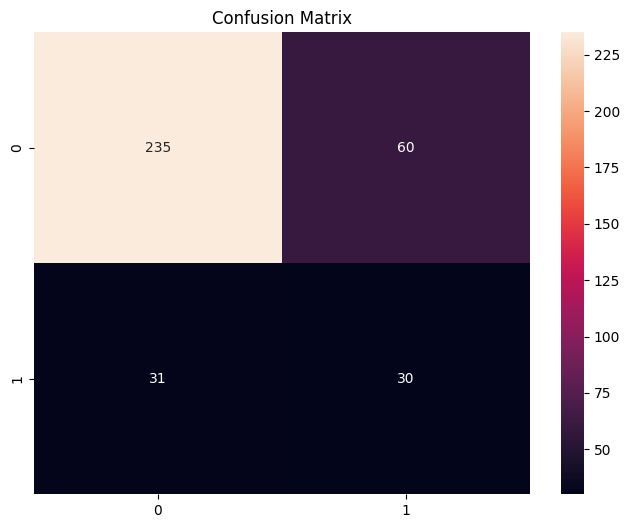

Accuracy reached on test data: 0.7443820224719101
F1 score reached on test data: 0.3973509933774834
Sensitivity reached on test data: 0.4918032786885246
Specificity reached on test data: 0.3333333333333333


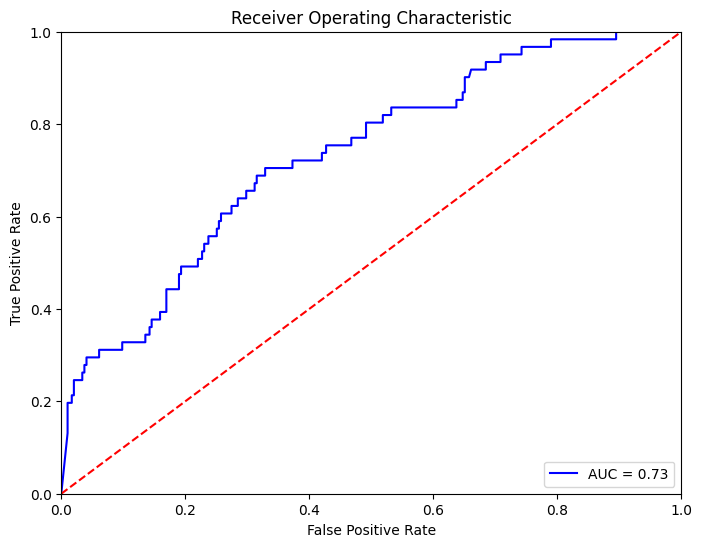

In [20]:
nb = sklearn.naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
class_probabilities = nb.predict_proba(X_test)
nb_proba = class_probabilities[:, 1]
nb_cm, nb_acc, nb_f1, nb_sensitivity, nb_specificity, nb_fpr, nb_tpr, nb_roc_auc = evaluate_model(y_test, nb_pred, nb_proba)
summarize_evaluation(nb_cm, nb_acc, nb_f1, nb_sensitivity, nb_specificity, nb_fpr, nb_tpr, nb_roc_auc)

### Logistic Regression

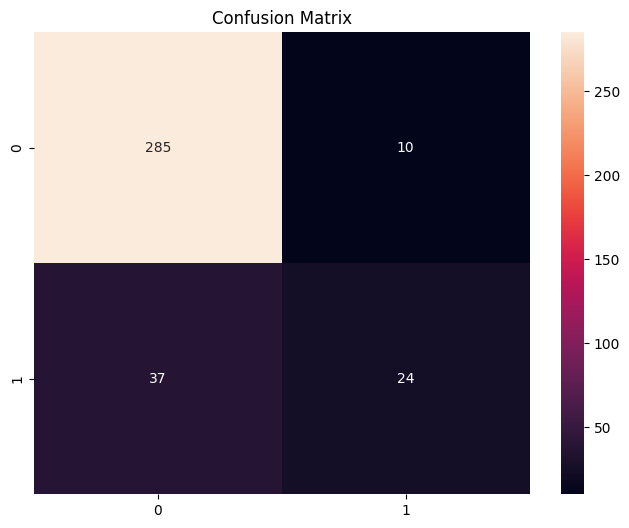

Accuracy reached on test data: 0.8679775280898876
F1 score reached on test data: 0.5052631578947369
Sensitivity reached on test data: 0.39344262295081966
Specificity reached on test data: 0.7058823529411765


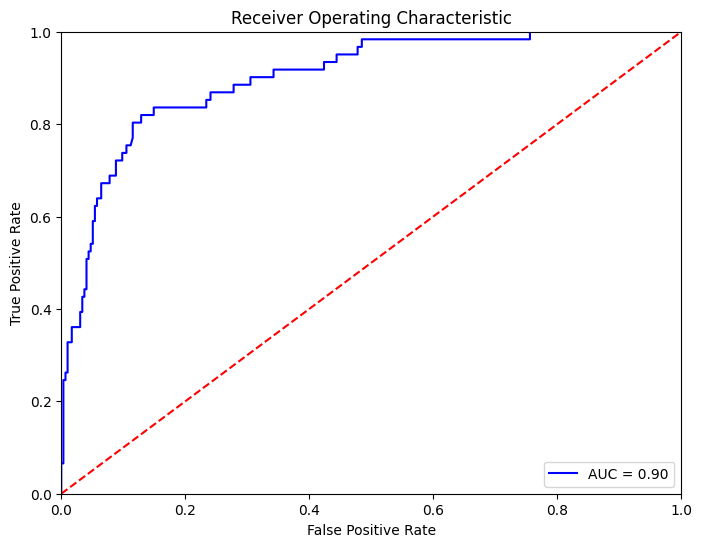

In [21]:
lr = LogisticRegression(random_state = 2115)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
class_probabilities = lr.predict_proba(X_test)
lr_proba = class_probabilities[:, 1]
lr_cm, lr_acc, lr_f1, lr_sensitivity, lr_specificity, lr_fpr, lr_tpr, lr_roc_auc = evaluate_model(y_test, lr_pred, lr_proba)
summarize_evaluation(lr_cm, lr_acc, lr_f1, lr_sensitivity, lr_specificity, lr_fpr, lr_tpr, lr_roc_auc)

### Model summary

In [22]:
dummy_sum = [dummy_acc, dummy_f1, dummy_sensitivity, dummy_specificity]
rf_sum = [rf_acc, rf_f1, rf_sensitivity, rf_specificity]
xgb_sum = [xgb_acc, xgb_f1, xgb_sensitivity, xgb_specificity]
bg_sum = [bg_acc, bg_f1, bg_sensitivity, bg_specificity]
gbm_sum = [gbm_acc, gbm_f1, gbm_sensitivity, gbm_specificity]
svc_sum = [svc_acc, svc_f1, svc_sensitivity, svc_specificity]
knn_sum = [knn_acc, knn_f1, knn_sensitivity, knn_specificity]
nb_sum = [nb_acc, nb_f1, nb_sensitivity, nb_specificity]
lr_sum = [lr_acc, lr_f1, lr_sensitivity, lr_specificity]
dt_sum = [dt_acc, dt_f1, dt_sensitivity, dt_specificity]

In [20]:
"""acc_sum = [dummy_acc, rf_acc, xgb_acc, bg_acc]
f1_sum = [dummy_f1, rf_f1, xgb_f1, bg_f1]"""

'acc_sum = [dummy_acc, rf_acc, xgb_acc, bg_acc]\nf1_sum = [dummy_f1, rf_f1, xgb_f1, bg_f1]'

In [23]:
summary_df = pd.DataFrame([dummy_sum, xgb_sum, rf_sum, dt_sum, bg_sum, gbm_sum, svc_sum, knn_sum, nb_sum, lr_sum], index=["Dummy Model", "XGBoost", "Random Forest", "Decidsion Tree", "Bagging", "LightGBM", "SVC", "KNN", "GaussianNB", "LogisticRegression"], columns=["Accuracy", "F1 score", "Sensitivity", "Specificity"])

In [24]:
summary_df.round(3)

,Accuracy,F1 score,Sensitivity,Specificity
Dummy Model,0.829,0.000,0.000,0.000
XGBoost,0.876,0.551,0.443,0.730
Random Forest,0.871,0.477,0.344,0.778
Decidsion Tree,0.826,0.523,0.557,0.493
Bagging,0.868,0.552,0.475,0.659
LightGBM,0.890,0.598,0.475,0.806
SVC,0.868,0.434,0.295,0.818
KNN,0.843,0.417,0.328,0.571
GaussianNB,0.744,0.397,0.492,0.333
LogisticRegression,0.868,0.505,0.393,0.706


### Best performing models in terms of specificity (excluding Base Model):
 - Random Forest (0.778)
 - LightGBM (0.778)



### Let's tune hyperparameters of best performing models

### XGBoost

In [22]:
from GPyOpt.methods import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import xgboost as xgb

In [23]:
precision_score(y_test, xgb_pred)

0.6744186046511628

In [24]:
xgb_cm

array([[281,  14],
       [ 32,  29]], dtype=int64)

In [25]:
true_negative = 29
false_positive = 16
true_negative/(true_negative+false_positive)

0.6444444444444445

In [26]:
def xgb_cv_score(parameters): #scoring function for the model
    parameters = parameters[0]
    score = cross_val_score(
            xgb.XGBClassifier(
                max_depth=int(parameters[0]),
                min_child_weight=int(parameters[1]),
                subsample=parameters[2],
                colsample_bytree=parameters[3],
                n_estimators=int(parameters[4]),
                learning_rate=parameters[5]),
            X_train, y_train, scoring=make_scorer(precision_score), cv=5).mean()
    return score

baysian_opt_bounds = [
	{'name': 'max_depth', 'type': 'discrete', 'domain': (3, 10, 5, 15)},
	{'name': 'min_child_weight', 'type': 'discrete', 'domain': (1, 5, 10)},
	{'name': 'subsample', 'type': 'continuous', 'domain': (0.5, 1.0)},
	{'name': 'colsample_bytree', 'type': 'continuous', 'domain': (0.5, 1.0)},
	{'name': 'n_estimators', 'type': 'discrete', 'domain': (100, 200, 300, 400)},
	{'name': 'learning_rate', 'type': 'continuous', 'domain': (0.01, 0.2)}
    ]
optimizer = BayesianOptimization(
	f=xgb_cv_score, domain=baysian_opt_bounds, model_type='GP',
	acquisition_type='EI', max_iter=25
    )
optimizer.run_optimization()
best_params_bayesian = optimizer.x_opt #getting best params
params_bayesian_opt = {
	'max_depth': int(best_params_bayesian[0]),
	'min_child_weight': int(best_params_bayesian[1]),
	'subsample': best_params_bayesian[2],
	'colsample_bytree': best_params_bayesian[3],
	'n_estimators': int(best_params_bayesian[4]),
	'learning_rate': best_params_bayesian[5]
    } #setting a dict of best params
# Initialize and train the model
xgb_model = xgb.XGBClassifier(**params_bayesian_opt) 
xgb_model.fit(X_train, y_train) #training


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7015578523998725, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17186778026239546,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

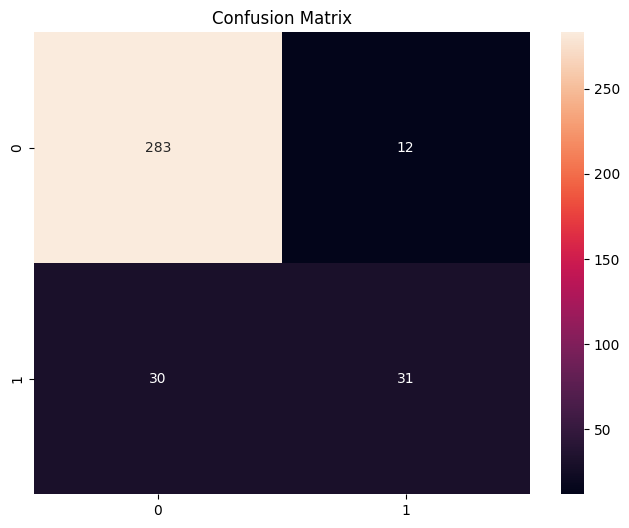

Accuracy reached on test data: 0.8820224719101124
F1 score reached on test data: 0.5961538461538461
Sensitivity reached on test data: 0.5081967213114754
Specificity reached on test data: 0.7209302325581395


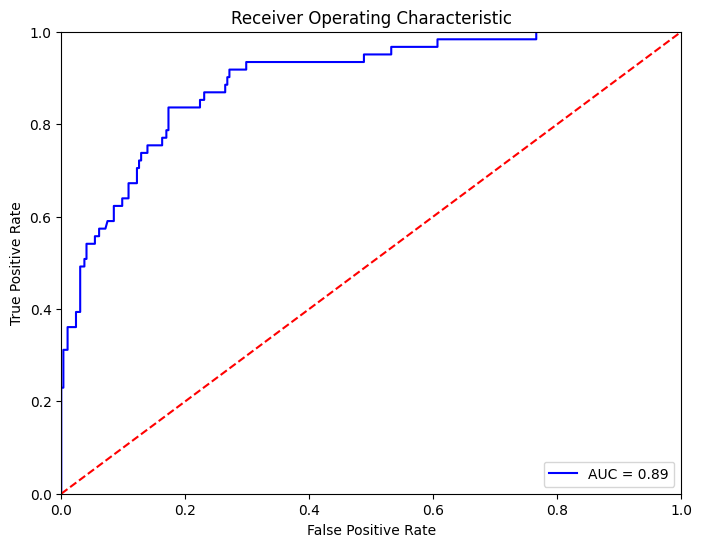

In [27]:
xgb_pred = xgb_model.predict(X_test)
class_probabilities = xgb_model.predict_proba(X_test)
xgb_proba = class_probabilities[:, 1]
xgb_cm, xgb_acc, xgb_f1, xgb_sensitivity, xgb_specificity, xgb_fpr, xgb_tpr, xgb_roc_auc = evaluate_model(y_test, xgb_pred, xgb_proba)
summarize_evaluation(xgb_cm, xgb_acc, xgb_f1, xgb_sensitivity, xgb_specificity, xgb_fpr, xgb_tpr, xgb_roc_auc)

### Random Forest

In [9]:
def rf_cv_score(parameters): #scoring function for the model
    parameters = parameters[0]
    score = cross_val_score(
            RandomForestClassifier(
                n_estimators=int(parameters[0]),
                max_depth=int(parameters[1]),
                min_samples_split=parameters[2],
                min_samples_leaf=parameters[3],
                max_features=int(parameters[4])),
            X_train, y_train, scoring=make_scorer(f1_score), cv=5).mean()
    return score


bayesian_opt_bounds = [
    {'name': 'n_estimators', 'type': 'discrete', 'domain': (100, 200, 300, 400)},
    {'name': 'max_depth', 'type': 'discrete', 'domain': (None, 10, 20, 30, 40, 50)},
    {'name': 'min_samples_split', 'type': 'discrete', 'domain': (int(2), int(5), int(10))},
    {'name': 'min_samples_leaf', 'type': 'discrete', 'domain': (int(1), int(2), int(4))},
    {'name': 'max_features', 'type': 'discrete', 'domain': (None, "sqrt", "log2")},
]
optimizer = BayesianOptimization(
	f=rf_cv_score, domain=baysian_opt_bounds, model_type='GP',
	acquisition_type='EI', max_iter=25
    )
optimizer.run_optimization()
best_params_bayesian = optimizer.x_opt #getting best params
params_bayesian_opt = {
	'n_estimators': int(best_params_bayesian[0]),
	'max_depth': int(best_params_bayesian[1]),
	'min_samples_split': best_params_bayesian[2],
	'min_samples_leaf': best_params_bayesian[3],
	'max_features': int(best_params_bayesian[4]),
    } #setting a dict of best params
# Initialize and train the model
rf_bay = RandomForestClassifier(**params_bayesian_opt) 
rf_bay.fit(X_train, y_train) #training


NameError: name 'BayesianOptimization' is not defined

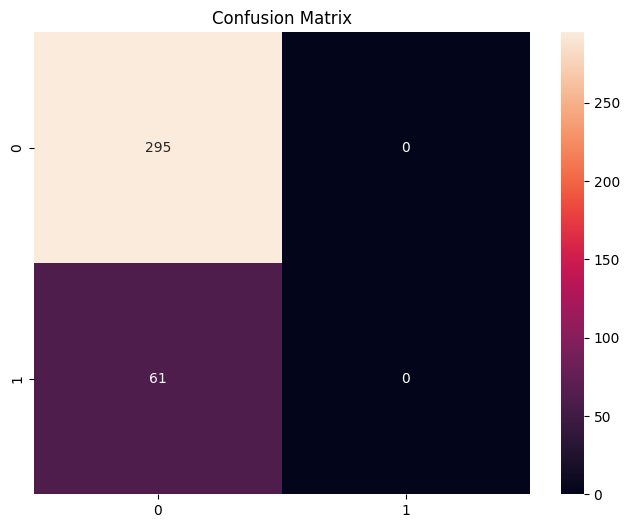

Accuracy reached on test data: 0.8286516853932584
F1 score reached on test data: 0.0
Sensitivity reached on test data: 0.0
Specificity reached on test data: 0.0


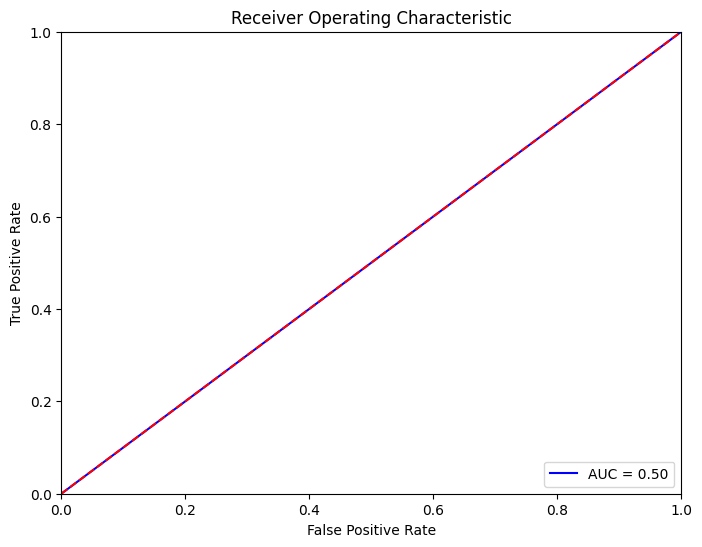

In [43]:
rf_pred_bay = rf_bay.predict(X_test)
class_probabilities = rf_bay.predict_proba(X_test)
rf_bay_proba = class_probabilities[:, 1]
rf_bay_cm, rf_bay_acc, rf_bay_f1, rf_bay_sensitivity, rf_bay_specificity, rf_bay_fpr, rf_bay_tpr, rf_bay_roc_auc = evaluate_model(y_test, rf_pred_bay, rf_bay_proba)
summarize_evaluation(rf_bay_cm, rf_bay_acc, rf_bay_f1, rf_bay_sensitivity, rf_bay_specificity, rf_bay_fpr, rf_bay_tpr, rf_bay_roc_auc)

In [9]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
rf = RandomForestClassifier(random_state = 2115)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 15, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = 5)
rf_random.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2115),
                   n_iter=25, n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7, 10, 12, 15,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

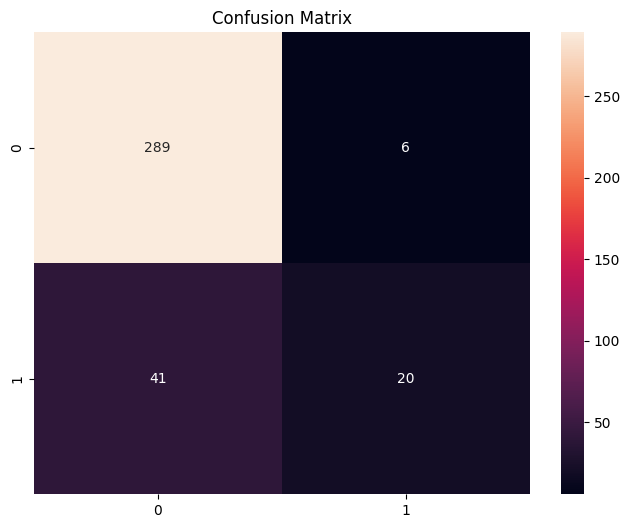

Accuracy reached on test data: 0.8679775280898876
F1 score reached on test data: 0.45977011494252873
Sensitivity reached on test data: 0.32786885245901637
Specificity reached on test data: 0.7692307692307693


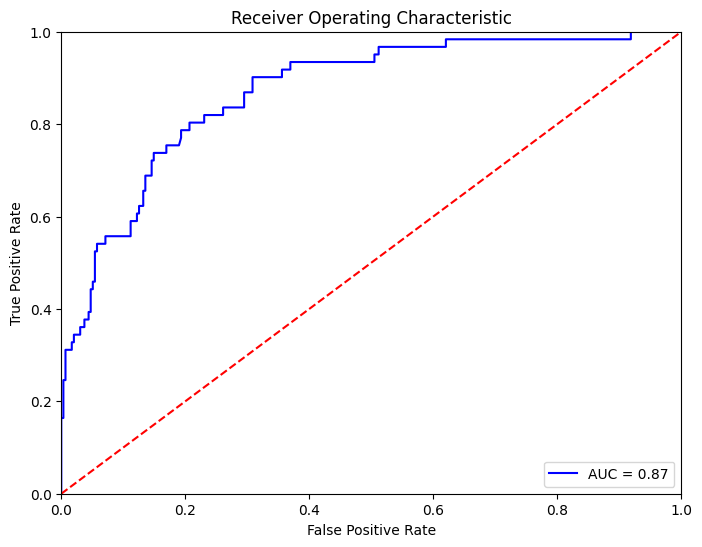

In [10]:
rf_pred_bay = rf_random.predict(X_test)
class_probabilities = rf_random.predict_proba(X_test)
rf_bay_proba = class_probabilities[:, 1]
rf_bay_cm, rf_bay_acc, rf_bay_f1, rf_bay_sensitivity, rf_bay_specificity, rf_bay_fpr, rf_bay_tpr, rf_bay_roc_auc = evaluate_model(y_test, rf_pred_bay, rf_bay_proba)
summarize_evaluation(rf_bay_cm, rf_bay_acc, rf_bay_f1, rf_bay_sensitivity, rf_bay_specificity, rf_bay_fpr, rf_bay_tpr, rf_bay_roc_auc)

In [12]:
pickle.dump(rf_random, open('models/rf1.pkl','wb'))